# Installation Requirements

In [ ]:
!pip uninstall --quiet tensorflow --yes
!pip uninstall --quiet kapre --yes
!pip install --quiet tensorflow==1.14.0
!pip install --quiet stable_baselines
!pip uninstall --quiet optuna --yes
!pip install --quiet optuna==2.10.0
!pip uninstall --quiet tensorboard-plugin-wit --yes
!pip install --quiet "gym==0.19.0"

     |████████████████████████████████| 109.3 MB 46 kB/s 
     |████████████████████████████████| 488 kB 7.5 MB/s 
     |████████████████████████████████| 3.1 MB 50.5 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 240 kB 7.6 MB/s 
     |████████████████████████████████| 18.3 MB 130 kB/s 
     |████████████████████████████████| 1.6 MB 54.6 MB/s 
     |████████████████████████████████| 308 kB 8.7 MB/s 
     |████████████████████████████████| 209 kB 52.5 MB/s 
     |████████████████████████████████| 81 kB 12.0 MB/s 
     |████████████████████████████████| 78 kB 263 kB/s 
     |████████████████████████████████| 147 kB 82.7 MB/s 
     |████████████████████████████████| 112 kB 62.0 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
     |████████████████████████████████| 1.6 MB 8.8 MB/s 


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/ColabNotebooks/Masterarbeit/RLModel/src

# run config.py to load all required settings  
%run config.py

/content/drive/MyDrive/ColabNotebooks/Masterarbeit/RLModel/src


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    fig = plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,vmin=0,vmax=240,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        ax.set_ylabel("Wahre Klasse")
        ax.set_xlabel("Vorhergesagte Klasse")
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 

        #plt.ylabel('True label')
        #plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# Konfusionsmatrix

In [ ]:
labels = ['TN','FP','FN','TP']
categories = ['gut', 'schlecht']

## Acc

In [ ]:
!python -W ignore evaluate.py --path '../models/best_models/best_model_acc_new/' --study_name 'hyperstudy_acc_new' --train_best_hypermodel --confusion_matrix

Confusion matrix Test_Data
TN 225 FP 16 FN 27 TP 24

Confusion matrix Train_Data
TN 550 FP 10 FN 44 TP 75



In [ ]:
TN=225
FP=16
FN=27
TP=24

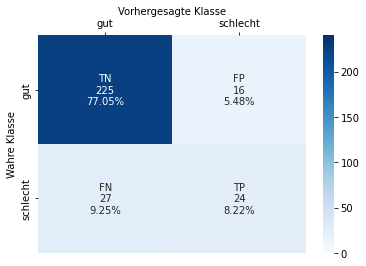

In [ ]:
cf_matrix = np.array([[TN,FP],[FN,TP]])
make_confusion_matrix(cf_matrix, group_names=labels,
                      categories=categories, cmap='Blues')

## F1

In [ ]:
!python -W ignore evaluate.py --path '../models/best_models/best_model_f1_new/' --study_name 'hyperstudy_f1_new' --train_best_hypermodel --confusion_matrix

Confusion matrix Test_Data
TN 215 FP 26 FN 11 TP 40

Confusion matrix Train_Data
TN 535 FP 25 FN 23 TP 96



In [ ]:
TN=215
FP=26
FN=11
TP=40

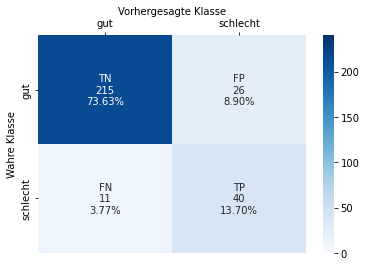

In [ ]:
cf_matrix = np.array([[TN,FP],[FN,TP]])
make_confusion_matrix(cf_matrix, group_names=labels,
                      categories=categories, cmap='Blues')

## GM

In [ ]:
!python -W ignore evaluate.py --path '../models/best_models/best_model_gm/' --study_name 'hyperstudy_gm' --train_best_hypermodel --confusion_matrix

Confusion matrix Test_Data
TN 216 FP 25 FN 15 TP 36

Confusion matrix Train_Data
TN 519 FP 41 FN 28 TP 91



In [ ]:
TN=216
FP=25
FN=15
TP=36

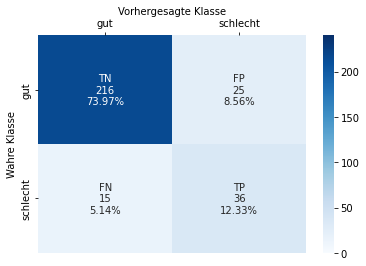

In [ ]:
cf_matrix = np.array([[TN,FP],[FN,TP]])
make_confusion_matrix(cf_matrix, group_names=labels,
                      categories=categories, cmap='Blues')

## Sens

In [ ]:
!python -W ignore evaluate.py --path '../models/best_models/best_model_sens/' --study_name 'hyperstudy_sens' --train_best_hypermodel --confusion_matrix

Confusion matrix Test_Data
TN 185 FP 56 FN 14 TP 37

Confusion matrix Train_Data
TN 475 FP 85 FN 28 TP 91



In [ ]:
TN=185
FP=56
FN=14
TP=37

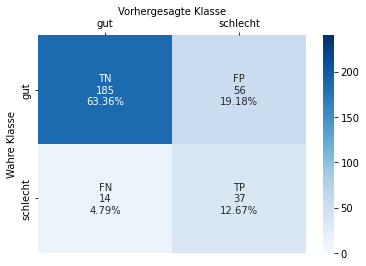

In [ ]:
cf_matrix = np.array([[TN,FP],[FN,TP]])
make_confusion_matrix(cf_matrix, group_names=labels,
                      categories=categories, cmap='Blues')

## Spez

In [ ]:
!python -W ignore evaluate.py --path '../models/best_models/best_model_spez/' --study_name 'hyperstudy_spez' --train_best_hypermodel --confusion_matrix

Confusion matrix Test_Data
TN 240 FP 1 FN 48 TP 3

Confusion matrix Train_Data
TN 559 FP 1 FN 114 TP 5



In [ ]:
TN=240
FP=1
FN=48
TP=3

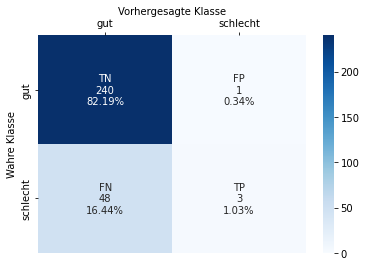

In [ ]:
cf_matrix = np.array([[TN,FP],[FN,TP]])
make_confusion_matrix(cf_matrix, group_names=labels,
                      categories=categories, cmap='Blues')